In [13]:
import scanpy as sc

In [14]:
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '/lustre/project/Stat/s1155202250/fastfolder/code/st/MultiGATE/MultiGATEgithub0607/tutorial_notebooks')
import MultiGATE 

In [15]:
adata1=sc.read_h5ad('./SPOTS_spleenResults/SPOTS_spleen_adata1.h5ad')
adata1

AnnData object with n_obs × n_vars = 2653 × 3000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mclust'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'avg', 'gene_peak_Net', 'hvg', 'log1p', 'mclust_colors', 'umap'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'
    obsp: 'avg_connectivities', 'avg_distances'

In [16]:
import scanpy as sc
adata2=sc.read_h5ad('./SPOTS_spleenResults/SPOTS_spleen_adata2.h5ad')
adata2

AnnData object with n_obs × n_vars = 2653 × 21
    uns: 'Spatial_Net', 'gene_peak_Net'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'spatial'

In [17]:
import os
# the location of R (used for the mclust clustering)
os.environ['R_HOME'] = "/lustre/project/Stat/s1155077016/condaenvs/Seurat4/lib/R" 
os.environ['R_USER'] = '/users/s1155077016/anaconda3/lib/python3.9/site-packages/rpy2'

In [18]:
size=20
n_clusters=5
adata1 = MultiGATE.mclust_R(adata1, used_obsm='MultiGATE_clip_all', num_cluster=n_clusters)

fitting ...
  |                                                                      |   0%

  |======================================================================| 100%


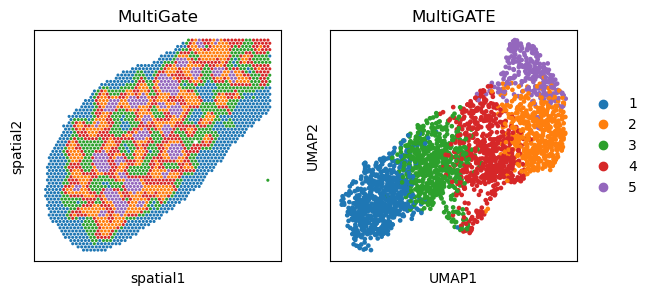

<Figure size 700x300 with 0 Axes>

In [19]:
plt.rcParams["figure.figsize"] = (7, 3) 
fig, axs = plt.subplots(1, 2)
sc.pl.embedding(adata1, basis='spatial', color='mclust',  title='MultiGate', s=size, show=False,ax=axs[0],legend_loc=None)
sc.pp.neighbors(adata1, use_rep='MultiGATE_clip_all',key_added = 'avg');
sc.tl.umap(adata1,neighbors_key = 'avg');
sc.pl.umap(adata1, color="mclust",title='MultiGATE',ax=axs[1]);

plt.tight_layout()
plt.show()

In [20]:
adata1

AnnData object with n_obs × n_vars = 2653 × 3000
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'mclust'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Spatial_Net', 'avg', 'gene_peak_Net', 'hvg', 'log1p', 'mclust_colors', 'umap'
    obsm: 'MultiGATE', 'MultiGATE_clip_all', 'X_umap', 'spatial'
    obsp: 'avg_connectivities', 'avg_distances'

In [21]:
import scanpy as sc

adata1.write_h5ad('./SPOTS_spleenResults/SPOTS_spleen_adata1.h5ad')
adata2.write_h5ad('./SPOTS_spleenResults/SPOTS_spleen_adata2.h5ad')
